In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
life = pd.read_csv('~/Downloads/Life Expectancy Data.csv') #2000 - 2015
happy = pd.read_csv('~/Downloads/DataForFigure2.1WHR2023.csv')
happy_big = pd.read_csv("~/Downloads/World Happiness Report.csv") #between 2005 and 2022

In [7]:
happy_big

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,Sub-Saharan Africa,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726,0.550508
2195,Zimbabwe,Sub-Saharan Africa,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354,0.456455
2196,Zimbabwe,Sub-Saharan Africa,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736,0.577302
2197,Zimbabwe,Sub-Saharan Africa,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682,0.665703


In [3]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
min(life['Year'])

2000

In [5]:
def dev_or_not(series):
    """
    developed --> 1
    developing --> 0
    """
    to_return = []
    for string in series: 
        if string == 'Developed':
            to_return.append(1)
        else:
            to_return.append(0)
    return pd.Series(to_return)

In [4]:
def pipeline(life):
    binary_status = dev_or_not(life['Status'])
    life['Status'] = binary_status
    df_grouped = life.groupby('Country').agg(np.mean).reset_index()
    df_small = df_grouped[['Country', 'Life expectancy ', 'Status']]
    return df_small

In [5]:
to_scatter_life = pipeline(life)

In [37]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
to_scatter_happy = happy[['Country name', 'Healthy life expectancy']]

In [12]:
merged = to_scatter_life.merge(to_scatter_happy, how='inner', left_on='Country', right_on='Country name')

In [27]:
merged.columns

Index(['Life expectancy ', 'Status', 'Healthy life expectancy'], dtype='object')

Text(0, 0.5, 'Life Expectancy from World Happiness Report')

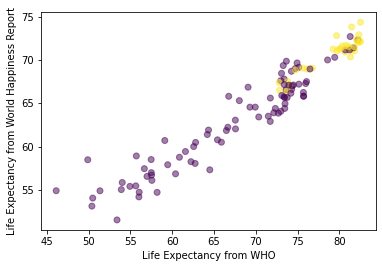

In [34]:
plt.scatter(x=merged['Life expectancy '], y=merged['Healthy life expectancy'] ,c=merged['Status'], alpha=0.5)
plt.xlabel('Life Expectancy from WHO')
plt.ylabel('Life Expectancy from World Happiness Report')

## Visualizations

1. two overlayed histograms, compare the distributions of happiness in developed vs undevelop, 
2. compare the distribution of life expectancy in developed vs undevelop
3. scatter plot: x: life expectancy from life, y is health life expectancy from life, where the color differentiates between dveloped and undeveloped
4. two line graphs where the x is the year and there are two line graphs over time measuring GDP and life expectancy

In [4]:
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
x_col = 'Life expectancy '
y_col = 'Healthy life expectancy'

In [39]:
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [14]:
life[(life['Status'] != 'Developed') & (life['Status'] != 'Developing')]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


In [46]:
to_scatter_life = life.groupby('Country').agg(np.mean)

In [50]:
life_reset = to_scatter_life.reset_index()

In [51]:
to_scatter_life = life_reset[['Country', 'Life expectancy ', 'Status']]

In [58]:
to_scatter_life[(to_scatter_life['Status'] != 1)]

,Country,Life expectancy,Status
0,Afghanistan,58.19375,0.0
1,Albania,75.15625,0.0
2,Algeria,73.61875,0.0
3,Angola,49.01875,0.0
4,Antigua and Barbuda,75.05625,0.0
...,...,...,...
188,Venezuela (Bolivarian Republic of),73.38750,0.0
189,Viet Nam,74.77500,0.0
190,Yemen,63.86250,0.0
191,Zambia,53.90625,0.0


In [60]:
to_scatter_life['Status'].is_unique

False

In [18]:
binary_status = dev_or_not(life['Status'])

In [20]:
life['Status'] = binary_status

0       0
1       0
2       0
3       0
4       0
       ..
2933    0
2934    0
2935    0
2936    0
2937    0
Name: Status, Length: 2938, dtype: int64

In [3]:
data = pd.read_csv('~/Downloads/data_to_annotate - data_to_annotate.csv')

In [4]:
data.head()

,id,source,label,text
0,367,3034736147,2,Q. What's the last 48 hours been like for AD a...
1,331,3034736147,4,Q. The way you walked in and the way you're ex...
2,418,3034736147,4,"Q. As you say, the coach and other members of ..."
3,196,3034736147,3,Q. You kind of gave a shrug to Tim about your ...
4,256,3034736147,2,Q. Is it common for LeBron to send texts about...


In [6]:
data.to_csv("annotations.txt", sep='\t', index=False, header=False)

In [ ]:
# columns = ['Life expectancy ', 'Adult Mortality',
#        'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
#        'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
#        'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
#        ' thinness  1-19 years', ' thinness 5-9 years',
#        'Income composition of resources', 'Schooling',
#        'Life Ladder', 'Log GDP Per Capita', 'Social Support',
#        'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
#        'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
#        'Negative Affect', 'Confidence In National Government']

# fig, ax = plt.subplots(len(columns), 1, figsize=(5, 100))


# for feature in np.arange(len(columns)): 
#     plt.subplots_adjust(hspace=0.8)
#     ax[feature].hist(merged[columns[feature]], bins = 40, density = True)
#     ax[feature].set_title(columns[feature])
